# Game results

In [2]:
import pandas as pd
import json
from IPython.display import display
import matplotlib.pyplot as plt


# Load the JSON data from a file or string
with open('categorizameconvoz-default-rtdb-export.json', 'r') as f:
    data = json.load(f)

# Extract user information and store it in a list of dictionaries
user_data = []
for user_id, user_info in data['Usuarios'].items():
    user_data.append({
        'User ID': user_id,
        'Age': int(user_info['Edad']),
        'Genre': 'Female' if user_info['Genero'] == 0 else 'Male' if user_info['Genero'] == 1 else 'Non binary' if user_info['Genero'] == 2 else 'Not answered',
        'Total score': int(user_info['Puntuacion total']),
        'Last level played': user_info['Nivel actual de juego']
    })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(user_data)
game_completed = ['Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','No','Yes']
df['Game completed'] = game_completed
#attempts = ['No','No','No','Si']
#df['Más de un intento'] = attempts

# Print the resulting DataFrame
df

,User ID,Age,Genre,Total score,Last level played,Game completed
0,2ZhLzJsoanZ1O2pHc3brU8wEOws2,28,Male,240,Nivel 15,Yes
1,6rIqJitNhTWGP9FUuhAsYXgE5bv2,62,Female,305,Nivel 15,Yes
2,9uDnJkmFCraZtwcUGKhUP8T7POm1,46,Male,231,Nivel 15,Yes
3,A9s289qG9laEhQWejrovjb8ENUw1,66,Male,234,Nivel 15,Yes
4,AwE03Y89V8X6LI90MyVzghs0iWE2,37,Male,374,Nivel 3,Yes
5,Bo2MA535hecFllsja7DF7Ug6FOw1,26,Male,229,Nivel 15,Yes
6,D7sG32EBv8fmGFv2xCkf1UE7oNY2,31,Male,206,Nivel 15,Yes
7,PkcvyP0Db5gGNa5ZKBZgz2SYIk22,28,Male,240,Nivel 15,Yes
8,Q6njLAtKA0cCRgclchG13LdtUN93,30,Female,230,Nivel 15,Yes
9,Q9O6saofRlfC47lDb56fVyAvhFt1,33,Male,229,Nivel 15,Yes


In [5]:
# Calculate statistics for 'age' column
age_min = df['Age'].min()
age_max = df['Age'].max()
age_mean = df['Age'].mean()
age_std = df['Age'].std()

# Calculate statistics for 'total_score' column
score_min = df['Total score'].min()
score_max = df['Total score'].max()
score_mean = df['Total score'].mean()
score_std = df['Total score'].std()

# Print the statistics
print("Age:")
print("Minimum:", age_min)
print("Maximum:", age_max)
print("Mean:", age_mean)
print("Standard Deviation:", age_std)

print("\nTotal Score:")
print("Minimum:", score_min)
print("Maximum:", score_max)
print("Mean:", score_mean)
print("Standard Deviation:", score_std)

Age:
Minimum: 26
Maximum: 66
Mean: 38.1875
Standard Deviation: 14.077020281295328

Total Score:
Minimum: 44
Maximum: 374
Mean: 231.375
Standard Deviation: 64.25249670894769


In [6]:
# Initialize an empty dictionary to store user tables
user_tables = {}

# Define custom sorting key for level names
def sort_key(level):
    if level == "Tutorial":
        return 0
    elif level.startswith("Nivel"):
        return int(level.split()[1])
    else:
        return float('inf')

# Iterate over each user
for user_id, user_info in data['Usuarios'].items():
    # Extract game results
    results = user_info['Resultados']['Juegos']
    
    # Initialize lists to store level, duration, and score for each user
    levels = []
    durations = []
    scores = []
    
    # Iterate over each level and extract the duration and score
    for level, level_info in sorted(results.items(), key=lambda x: sort_key(x[0])):
        if 'Duracion del juego' in level_info and 'Puntuacion' in level_info:
            levels.append(level)
            durations.append(level_info['Duracion del juego'])
            scores.append(level_info['Puntuacion'])

    # Create a DataFrame for the user
    user_data = {
        'Level': levels,
        'Duration': durations,
        'Score': scores
    }
    user_df = pd.DataFrame(user_data)

    # Add the user DataFrame to the dictionary
    user_tables[user_id] = user_df

# Print each user table
for user_id, user_table in user_tables.items():
    print(f"User ID: {user_id}")
    print(user_table)
    print('\n')

User ID: 2ZhLzJsoanZ1O2pHc3brU8wEOws2
       Level    Duration  Score
0   Tutorial   49.029190      9
1    Nivel 1   69.385567     10
2    Nivel 2   64.299416     10
3    Nivel 3   66.159889      5
4    Nivel 4   75.945602      9
5    Nivel 5  104.041649     10
6    Nivel 6   59.697014      7
7    Nivel 7   70.862595     10
8    Nivel 8   71.958336     10
9    Nivel 9   74.300743     10
10  Nivel 10   56.706863     10
11  Nivel 11   80.514641     10
12  Nivel 12   52.701584     10
13  Nivel 13   23.227417      5
14  Nivel 14   24.595276      5
15  Nivel 15    8.872910    100


User ID: 6rIqJitNhTWGP9FUuhAsYXgE5bv2
       Level   Duration  Score
0   Tutorial  59.065308      9
1    Nivel 1  56.440926     10
2    Nivel 2  55.443443     10
3    Nivel 3  50.587860      5
4    Nivel 4  54.959473     10
5    Nivel 5  78.760735     11
6    Nivel 6  53.779396      7
7    Nivel 7  54.878906     10
8    Nivel 8  59.064766     10
9    Nivel 9  55.828293     10
10  Nivel 10  57.323212     10
11  Ni

In [7]:
# Initialize an empty dictionary to store user tables
user_tables = {}

# Define custom sorting key for level names
def sort_key(level):
    if level == "Tutorial":
        return 0
    elif level.startswith("Nivel"):
        return int(level.split()[1])
    else:
        return float('inf')

# Iterate over each user
for user_id, user_info in data['Usuarios'].items():
    # Extract game results
    results = user_info['Resultados']['Juegos']

    # Initialize lists to store level, duration, and score for each user
    levels = []
    durations = []
    scores = []

    # Iterate over each level and extract the duration and score
    for level, level_info in sorted(results.items(), key=lambda x: sort_key(x[0])):
        if 'Duracion del juego' in level_info and 'Puntuacion' in level_info:
            levels.append(level)
            duration = round(level_info['Duracion del juego'], 2)  # Round the duration to 2 decimals
            durations.append(duration)
            scores.append(level_info['Puntuacion'])

    # Create a DataFrame for the user
    user_data = {
        'Level': levels,
        'Duration': durations,
        'Score': scores
    }
    user_df = pd.DataFrame(user_data)

    # Add the user DataFrame to the dictionary
    user_tables[user_id] = user_df

# Display each user table
for user_id, user_table in user_tables.items():
    print(f"User ID: {user_id}")
    display(user_table)
    print('\n')

User ID: 2ZhLzJsoanZ1O2pHc3brU8wEOws2


,Level,Duration,Score
0,Tutorial,49.03,9
1,Nivel 1,69.39,10
2,Nivel 2,64.30,10
3,Nivel 3,66.16,5
4,Nivel 4,75.95,9
5,Nivel 5,104.04,10
6,Nivel 6,59.70,7
7,Nivel 7,70.86,10
8,Nivel 8,71.96,10
9,Nivel 9,74.30,10




User ID: 6rIqJitNhTWGP9FUuhAsYXgE5bv2


,Level,Duration,Score
0,Tutorial,59.07,9
1,Nivel 1,56.44,10
2,Nivel 2,55.44,10
3,Nivel 3,50.59,5
4,Nivel 4,54.96,10
5,Nivel 5,78.76,11
6,Nivel 6,53.78,7
7,Nivel 7,54.88,10
8,Nivel 8,59.06,10
9,Nivel 9,55.83,10




User ID: 9uDnJkmFCraZtwcUGKhUP8T7POm1


,Level,Duration,Score
0,Tutorial,79.69,9
1,Nivel 1,82.27,10
2,Nivel 2,61.32,10
3,Nivel 3,85.00,5
4,Nivel 4,77.79,9
5,Nivel 5,99.16,11
6,Nivel 6,76.94,7
7,Nivel 7,93.83,10
8,Nivel 8,70.81,10
9,Nivel 9,55.03,10




User ID: A9s289qG9laEhQWejrovjb8ENUw1


,Level,Duration,Score
0,Tutorial,146.99,9
1,Nivel 1,149.76,9
2,Nivel 2,94.68,9
3,Nivel 3,75.83,6
4,Nivel 4,119.25,9
5,Nivel 5,174.10,9
6,Nivel 6,128.87,7
7,Nivel 7,120.35,10
8,Nivel 8,97.54,10
9,Nivel 9,98.29,10




User ID: AwE03Y89V8X6LI90MyVzghs0iWE2


,Level,Duration,Score
0,Tutorial,44.61,9
1,Nivel 1,125.55,10
2,Nivel 2,171.98,10
3,Nivel 3,180.02,5
4,Nivel 4,92.30,9
5,Nivel 5,100.55,11
6,Nivel 6,50.36,7
7,Nivel 7,57.83,10
8,Nivel 8,59.65,10
9,Nivel 9,72.63,10




User ID: Bo2MA535hecFllsja7DF7Ug6FOw1


,Level,Duration,Score
0,Tutorial,70.30,8
1,Nivel 1,62.82,10
2,Nivel 2,97.51,10
3,Nivel 3,39.49,6
4,Nivel 4,69.70,9
5,Nivel 5,148.54,10
6,Nivel 6,95.28,6
7,Nivel 7,136.61,10
8,Nivel 8,132.61,10
9,Nivel 9,99.86,10




User ID: D7sG32EBv8fmGFv2xCkf1UE7oNY2


,Level,Duration,Score
0,Tutorial,100.38,9
1,Nivel 1,129.27,9
2,Nivel 2,80.22,9
3,Nivel 4,61.03,10
4,Nivel 5,109.79,10
5,Nivel 7,63.34,10
6,Nivel 8,60.03,10
7,Nivel 9,79.34,9
8,Nivel 11,57.07,10
9,Nivel 12,53.06,10




User ID: PkcvyP0Db5gGNa5ZKBZgz2SYIk22


,Level,Duration,Score
0,Tutorial,46.38,9
1,Nivel 1,56.45,10
2,Nivel 2,51.36,10
3,Nivel 3,47.35,6
4,Nivel 4,56.35,10
5,Nivel 5,104.23,10
6,Nivel 6,116.44,5
7,Nivel 7,73.41,9
8,Nivel 8,54.96,10
9,Nivel 9,67.81,10




User ID: Q6njLAtKA0cCRgclchG13LdtUN93


,Level,Duration,Score
0,Tutorial,47.70,9
1,Nivel 1,47.65,10
2,Nivel 2,52.86,10
3,Nivel 3,32.95,6
4,Nivel 4,67.98,9
5,Nivel 5,76.78,10
6,Nivel 6,48.17,7
7,Nivel 7,50.19,10
8,Nivel 8,51.14,10
9,Nivel 9,68.50,9




User ID: Q9O6saofRlfC47lDb56fVyAvhFt1


,Level,Duration,Score
0,Tutorial,50.53,9
1,Nivel 1,67.73,10
2,Nivel 2,65.47,10
3,Nivel 3,55.53,6
4,Nivel 4,96.57,9
5,Nivel 5,104.42,10
6,Nivel 6,69.97,5
7,Nivel 7,70.98,10
8,Nivel 8,61.15,10
9,Nivel 9,77.98,10




User ID: W0SKSJJlgbMyKh0Jj9LmplUL8or1


,Level,Duration,Score
0,Tutorial,63.41,9
1,Nivel 1,59.98,10
2,Nivel 2,55.00,10
3,Nivel 3,45.10,6
4,Nivel 4,59.40,9
5,Nivel 5,144.43,10
6,Nivel 6,68.39,7
7,Nivel 7,72.36,9
8,Nivel 8,53.73,10
9,Nivel 9,96.57,10




User ID: dTzvrlofwag4641oxGo4NnDTnrb2


,Level,Duration,Score
0,Tutorial,75.91,9
1,Nivel 1,64.48,10
2,Nivel 2,58.10,10
3,Nivel 3,47.62,6
4,Nivel 4,73.24,9
5,Nivel 5,107.14,11
6,Nivel 6,71.92,7
7,Nivel 7,65.21,10
8,Nivel 8,59.71,10
9,Nivel 9,67.60,10




User ID: qQU4SOoUOzZc06IkHXiJAe2vQbl1


,Level,Duration,Score
0,Tutorial,61.29,9
1,Nivel 1,84.43,9
2,Nivel 2,100.48,9
3,Nivel 3,132.77,6
4,Nivel 4,169.08,10
5,Nivel 5,103.72,11
6,Nivel 6,63.99,7
7,Nivel 8,61.11,10
8,Nivel 9,89.50,9
9,Nivel 10,58.53,10




User ID: uECETfJX7NOGxqGJgrdmTw8A0lA3


,Level,Duration,Score
0,Nivel 1,41.26,10
1,Nivel 2,60.16,9
2,Nivel 3,41.31,6
3,Nivel 4,43.72,9
4,Nivel 5,73.24,10
5,Nivel 6,48.90,7
6,Nivel 7,52.57,10
7,Nivel 8,41.19,10
8,Nivel 9,60.21,10
9,Nivel 10,40.48,10




User ID: uUTvFKDiyEQvbpiq3MepqAsIoCj1


,Level,Duration,Score
0,Tutorial,51.97,9
1,Nivel 1,83.56,10
2,Nivel 2,77.26,10
3,Nivel 3,81.72,5
4,Nivel 4,66.54,10




User ID: wUqOC7GkQ8dbuXZ9dkpshi58WbF3


,Level,Duration,Score
0,Tutorial,101.07,9
1,Nivel 1,99.56,9
2,Nivel 2,86.98,10
3,Nivel 3,61.78,6
4,Nivel 4,64.27,10
5,Nivel 5,125.95,11
6,Nivel 6,58.39,7
7,Nivel 7,95.63,10
8,Nivel 8,91.73,10
9,Nivel 9,92.99,10


In [12]:
# Set global font size for the tables
plt.rcParams['font.size'] = 12

# Iterate over each user
for user_id, user_table in user_tables.items():
    # Create a figure with larger size and higher DPI
    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

    # Remove axis
    ax.axis('off')

    # Add user ID as title with improved font size
    ax.set_title(f"User ID: {user_id}", fontsize=16)

    # Round the duration values to 2 decimal places
    rounded_durations = [round(duration, 2) for duration in user_table['Duración']]

    # Create a copy of the user table with rounded duration values
    rounded_user_table = user_table.copy()
    rounded_user_table['Duration'] = rounded_durations

    # Create the table with improved font size
    table = ax.table(cellText=rounded_user_table.values,
                     colLabels=rounded_user_table.columns,
                     cellLoc='center',
                     loc='center')

    # Set table properties
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(1.5, 1.5)

    # Save the table as an image with higher DPI
    table_file_path = f"user_{user_id}_table.png"
    plt.savefig(table_file_path, bbox_inches='tight', dpi=300)

    # Display the user ID and the path of the saved image
    print(f"User ID: {user_id}")
    print(f"Table saved at: {table_file_path}")
    print('\n')

    # Close the figure
    plt.close(fig)


User ID: 2ZhLzJsoanZ1O2pHc3brU8wEOws2
Table saved at: user_2ZhLzJsoanZ1O2pHc3brU8wEOws2_table.png


User ID: 6rIqJitNhTWGP9FUuhAsYXgE5bv2
Table saved at: user_6rIqJitNhTWGP9FUuhAsYXgE5bv2_table.png


User ID: 9uDnJkmFCraZtwcUGKhUP8T7POm1
Table saved at: user_9uDnJkmFCraZtwcUGKhUP8T7POm1_table.png


User ID: A9s289qG9laEhQWejrovjb8ENUw1
Table saved at: user_A9s289qG9laEhQWejrovjb8ENUw1_table.png


User ID: AwE03Y89V8X6LI90MyVzghs0iWE2
Table saved at: user_AwE03Y89V8X6LI90MyVzghs0iWE2_table.png


User ID: Bo2MA535hecFllsja7DF7Ug6FOw1
Table saved at: user_Bo2MA535hecFllsja7DF7Ug6FOw1_table.png


User ID: PkcvyP0Db5gGNa5ZKBZgz2SYIk22
Table saved at: user_PkcvyP0Db5gGNa5ZKBZgz2SYIk22_table.png


User ID: Q9O6saofRlfC47lDb56fVyAvhFt1
Table saved at: user_Q9O6saofRlfC47lDb56fVyAvhFt1_table.png


User ID: VlURsjGViESCfuFgDLkB1XfERHx1
Table saved at: user_VlURsjGViESCfuFgDLkB1XfERHx1_table.png


User ID: W0SKSJJlgbMyKh0Jj9LmplUL8or1
Table saved at: user_W0SKSJJlgbMyKh0Jj9LmplUL8or1_table.png




In [8]:
# Initialize empty dictionaries to store aggregated statistics
duration_stats = {}
score_stats = {}

# Define custom sorting key for level names
def sort_key(level):
    if level == "Tutorial":
        return 0
    elif level.startswith("Nivel"):
        return int(level.split()[1])
    else:
        return float('inf')

# Iterate over each user
for user_id, user_info in data['Usuarios'].items():
    # Extract game results
    results = user_info['Resultados']['Juegos']

    # Iterate over each level and extract the duration and score
    for level, level_info in results.items():
        if 'Duracion del juego' in level_info and 'Puntuacion' in level_info:
            duration = level_info['Duracion del juego']
            score = level_info['Puntuacion']

            # Update duration statistics for the level
            if level in duration_stats:
                duration_stats[level].append(duration)
            else:
                duration_stats[level] = [duration]

            # Update score statistics for the level
            if level in score_stats:
                score_stats[level].append(score)
            else:
                score_stats[level] = [score]

# Calculate mean and standard deviation for duration and score for each level
duration_mean_std = {}
score_mean_std = {}

# Sort the level names
sorted_levels = sorted(set(duration_stats.keys()).union(score_stats.keys()), key=sort_key)

for level in sorted_levels:
    durations = duration_stats.get(level, [])
    scores = score_stats.get(level, [])

    duration_mean_std[level] = {
        'mean': round(pd.Series(durations).mean(), 2),
        'std': round(pd.Series(durations).std(), 2)
    }

    score_mean_std[level] = {
        'mean': round(pd.Series(scores).mean(), 2),
        'std': round(pd.Series(scores).std(), 2)
    }

# Print the aggregated statistics
print("Duration Statistics:")
for level, stats in duration_mean_std.items():
    print(f"{level}: Mean={stats['mean']}, Std={stats['std']}")

print("\nScore Statistics:")
for level, stats in score_mean_std.items():
    print(f"{level}: Mean={stats['mean']}, Std={stats['std']}")


Duration Statistics:
Tutorial: Mean=69.89, Std=28.07
Nivel 1: Mean=80.04, Std=31.25
Nivel 2: Mean=77.07, Std=30.32
Nivel 3: Mean=69.55, Std=39.52
Nivel 4: Mean=78.01, Std=30.41
Nivel 5: Mean=110.32, Std=27.8
Nivel 6: Mean=72.22, Std=24.95
Nivel 7: Mean=77.0, Std=25.82
Nivel 8: Mean=68.43, Std=22.97
Nivel 9: Mean=77.1, Std=15.26
Nivel 10: Mean=62.22, Std=16.55
Nivel 11: Mean=62.98, Std=13.91
Nivel 12: Mean=65.56, Std=24.29
Nivel 13: Mean=36.38, Std=14.12
Nivel 14: Mean=26.95, Std=7.78
Nivel 15: Mean=15.18, Std=10.44

Score Statistics:
Tutorial: Mean=8.93, Std=0.26
Nivel 1: Mean=9.75, Std=0.45
Nivel 2: Mean=9.75, Std=0.45
Nivel 3: Mean=5.67, Std=0.49
Nivel 4: Mean=9.38, Std=0.5
Nivel 5: Mean=10.33, Std=0.62
Nivel 6: Mean=6.64, Std=0.74
Nivel 7: Mean=9.86, Std=0.36
Nivel 8: Mean=10.0, Std=0.0
Nivel 9: Mean=9.8, Std=0.41
Nivel 10: Mean=10.0, Std=0.0
Nivel 11: Mean=10.0, Std=0.0
Nivel 12: Mean=10.0, Std=0.0
Nivel 13: Mean=5.0, Std=0.0
Nivel 14: Mean=5.0, Std=0.0
Nivel 15: Mean=100.0, Std=0.

In [9]:
# Initialize empty dictionaries to store aggregated statistics
duration_stats = {}
score_stats = {}

# Define custom sorting key for level names
def sort_key(level):
    if level == "Tutorial":
        return 0
    elif level.startswith("Nivel"):
        return int(level.split()[1])
    else:
        return float('inf')

# Iterate over each user
for user_id, user_info in data['Usuarios'].items():
    # Extract game results
    results = user_info['Resultados']['Juegos']

    # Iterate over each level and extract the duration and score
    for level, level_info in results.items():
        if 'Duracion del juego' in level_info and 'Puntuacion' in level_info:
            duration = level_info['Duracion del juego']
            score = level_info['Puntuacion']

            # Update duration statistics for the level
            if level in duration_stats:
                duration_stats[level].append(duration)
            else:
                duration_stats[level] = [duration]

            # Update score statistics for the level
            if level in score_stats:
                score_stats[level].append(score)
            else:
                score_stats[level] = [score]

# Calculate mean and standard deviation for duration and score for each level
duration_mean_std = {}
score_mean_std = {}

# Sort the level names
sorted_levels = sorted(set(duration_stats.keys()).union(score_stats.keys()), key=sort_key)

for level in sorted_levels:
    durations = duration_stats.get(level, [])
    scores = score_stats.get(level, [])

    duration_mean_std[level] = {
        'mean': round(pd.Series(durations).mean(), 2),
        'std': round(pd.Series(durations).std(), 2)
    }

    score_mean_std[level] = {
        'mean': round(pd.Series(scores).mean(), 2),
        'std': round(pd.Series(scores).std(), 2)
    }

# Create DataFrame for duration statistics
duration_df = pd.DataFrame(duration_mean_std).transpose()
duration_df.columns = ['Duration mean', 'Duration SD']

# Create DataFrame for score statistics
score_df = pd.DataFrame(score_mean_std).transpose()
score_df.columns = ['Score mean', 'Score SD']

# Combine the duration and score DataFrames
combined_df = pd.concat([duration_df, score_df], axis=1)

# Add a new column for total score values
total_scores = [9, 10, 10, 6, 10, 11, 7, 10, 10, 10, 10, 10, 10, 5, 5, 100]
combined_df['Maximum score'] = total_scores

# Reorder the columns
column_order = ['Duration mean', 'Duration SD', 'Maximum score', 'Score mean', 'Score SD']
combined_df = combined_df[column_order]

# Add a new column for custom sorting
combined_df['Sorting Order'] = combined_df.index.map(sort_key)

# Sort the DataFrame based on the custom sorting order
combined_df = combined_df.sort_values(by='Sorting Order')

# Drop the 'Sorting Order' column
combined_df = combined_df.drop('Sorting Order', axis=1)

# Display the combined DataFrame
display(combined_df)


,Duration mean,Duration SD,Maximum score,Score mean,Score SD
Tutorial,69.89,28.07,9,8.93,0.26
Nivel 1,80.04,31.25,10,9.75,0.45
Nivel 2,77.07,30.32,10,9.75,0.45
Nivel 3,69.55,39.52,6,5.67,0.49
Nivel 4,78.01,30.41,10,9.38,0.50
Nivel 5,110.32,27.80,11,10.33,0.62
Nivel 6,72.22,24.95,7,6.64,0.74
Nivel 7,77.00,25.82,10,9.86,0.36
Nivel 8,68.43,22.97,10,10.00,0.00
Nivel 9,77.10,15.26,10,9.80,0.41


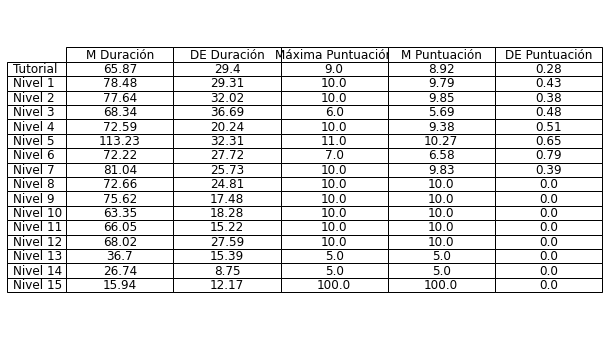

In [15]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))

# Ocultar marcas y etiquetas del eje
ax.axis('off')

# Generar la tabla a partir del DataFrame
table = ax.table(cellText=combined_df.values,
                 colLabels=combined_df.columns,
                 rowLabels=combined_df.index,
                 cellLoc='center',
                 loc='center')

# Ajustar el diseño de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Guardar la figura como imagen PNG
fig.savefig('tabla.png', bbox_inches='tight', dpi=300)


In [26]:
# Create a dictionary to store the data for each level
level_data = {}

# Iterate over each user
for user_id, user_data in data['Usuarios'].items():
    resultados = user_data['Resultados']['Juegos']
    
    # Iterate over each level
    for level, level_info in resultados.items():
        respuestas = level_info.get('Respuestas')
        
        # Check if the level has incorrect answers
        if respuestas and 'Incorrectas' in respuestas:
            incorrectas = respuestas['Incorrectas']
            
            # Check if the level already has data in the dictionary
            if level in level_data:
                # Append the incorrect answers to the existing data
                level_data[level].update({user_id: incorrectas})
            else:
                # Create a new entry in the dictionary
                level_data[level] = {user_id: incorrectas}

# Create a DataFrame for each level
dataframes = {}
for level, level_users in level_data.items():
    df = pd.DataFrame(level_users).T
    dataframes[level] = df

# Print the DataFrame for Tutorial level as an example
#dataframes['Tutorial']
dataframes['Nivel 1']

,cafÃ©,pan,queso,helado,manzana,vino,carne,pescado,tomate
2ZhLzJsoanZ1O2pHc3brU8wEOws2,la fe,tan,que eso que eso,NaN,NaN,NaN,NaN,NaN,NaN
9uDnJkmFCraZtwcUGKhUP8T7POm1,NaN,NaN,NaN,el lago,Puma Poma,vino francÃ©s,NaN,NaN,NaN
A9s289qG9laEhQWejrovjb8ENUw1,CAC,NaN,NaN,NaN,NaN,NaN,bistec,pez sardina besugo,NaN
D7sG32EBv8fmGFv2xCkf1UE7oNY2,cacao cacao,NaN,que eso que eso que eso,NaN,NaN,NaN,NaN,NaN,NaN
PkcvyP0Db5gGNa5ZKBZgz2SYIk22,NaN,NaN,y eso,NaN,NaN,NaN,NaN,NaN,NaN
Q9O6saofRlfC47lDb56fVyAvhFt1,NaN,NaN,queso redondo,NaN,NaN,NaN,NaN,NaN,fruta
dTzvrlofwag4641oxGo4NnDTnrb2,NaN,NaN,NaN,el lado,NaN,NaN,NaN,NaN,NaN
qQU4SOoUOzZc06IkHXiJAe2vQbl1,NaN,NaN,NaN,NaN,NaN,NaN,Carmen Carmen Carmen,pesado,NaN
uUTvFKDiyEQvbpiq3MepqAsIoCj1,NaN,NaN,NaN,el lado,NaN,NaN,NaN,NaN,NaN
wUqOC7GkQ8dbuXZ9dkpshi58WbF3,NaN,NaN,NaN,NaN,NaN,NaN,carnes carnes caramba que otra cosa,NaN,NaN


#  Questionnaire results

In [3]:
# Loading data
q = pd.read_csv("Cuestionario _Palabras Siderales_.csv")
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 18 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Marca temporal                                                                     12 non-null     object
 1   Nombre de usuario                                                                  12 non-null     object
 2   1. Utilizaría este juego frecuentemente.                                           12 non-null     int64 
 3   2. He encontrado el juego innecesariamente complejo.                               12 non-null     int64 
 4   3. He encontrado que el juego era fácil de utilizar.                               12 non-null     int64 
 5   4. Creo que necesitaría el soporte de una persona para utilizar el juego.          12 non-null     int64 
 6   5. C

In [24]:
q1 = q.iloc[:,2]-1
q2 = 5- q.iloc[:,3]
q3 = q.iloc[:,4]-1
q4 = 5- q.iloc[:,5]
q5 = q.iloc[:,6]-1
q6 = 5- q.iloc[:,7]
q7 = q.iloc[:,8]-1
q8 = 5- q.iloc[:,9]
q9 = q.iloc[:,10]-1
q10 = 5- q.iloc[:,11]
SUS_score = q1+q2+q3+q4+q5+q6+q7+q8+q9+q10
SUS_score = SUS_score * 2.5
#SUS score for each user (12 in total)
SUS_score

0     90.0
1     92.5
2     95.0
3     75.0
4     90.0
5     97.5
6     87.5
7     70.0
8     97.5
9     90.0
10    97.5
11    87.5
dtype: float64

In [27]:
print('SUS Mean and STD: ',SUS_score.mean(),SUS_score.std())

SUS Mean and STD:  89.16666666666667 8.682095822944358


In [34]:
q11 = q.iloc[:,12]
q12 = q.iloc[:,13]
q13 = q.iloc[:,14]
q14 = q.iloc[:,15]
q15 = q.iloc[:,16]
print('11. Did you notice that there was a narrative plot? Mean and STD: ',q11.mean(),q11.std())
print('12. What did you think of the narrative? Mean and STD: ',q12.mean(),q12.std())
print('13. Was the scoring a challenge for you? Mean and STD: ',q13.mean(),q13.std())
print('14. Did the scoring ranking with other players challenge you? Mean and STD: ',q14.mean(),q14.std())
print('15. Did the game was entertaining for you? Mean and STD: ',q15.mean(),q15.std())

11. Did you notice that there was a narrative plot? Mean and STD:  4.583333333333333 0.6685579234215215
12. What did you think of the narrative? Mean and STD:  4.416666666666667 0.7929614610987591
13. Was the scoring a challenge for you? Mean and STD:  3.0833333333333335 1.378954368902449
14. Did the scoring ranking with other players challenge you? Mean and STD:  3.75 1.4222261679238197
15. Did the game was entertaining for you? Mean and STD:  4.583333333333333 0.6685579234215215
